In [2]:
# Import data and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load CSV data into a DataFrame
DATA_PATH = ("../data/global-ai-job-market_10-25/ai_impact_jobs_2010_2025.csv")
df = pd.read_csv(DATA_PATH)

# **EXPLORATORY DATA ANALYSIS**

In [7]:
# Check number of rows and columns
df.shape

(5000, 22)

In [8]:
# View column types and missing values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_id                              5000 non-null   str    
 1   posting_year                        5000 non-null   int64  
 2   country                             5000 non-null   str    
 3   region                              5000 non-null   str    
 4   city                                5000 non-null   str    
 5   company_name                        5000 non-null   str    
 6   company_size                        5000 non-null   str    
 7   industry                            5000 non-null   str    
 8   job_title                           5000 non-null   str    
 9   seniority_level                     5000 non-null   str    
 10  ai_mentioned                        5000 non-null   bool   
 11  ai_keywords                         1623 non-null   st

In [9]:
# Show all DataFrame columns
pd.set_option('display.max_columns', None)

In [91]:
# Preview first rows of data
df['job_description_embedding_cluster'].unique()

array([14, 19,  2, 15, 13,  3,  7,  8,  6,  1, 12,  0,  5, 11, 18, 17,  9,
       16, 10,  4])

In [11]:
# Summary statistics for numeric columns
df.describe()

,posting_year,ai_intensity_score,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,job_description_embedding_cluster
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2017.519400,0.287312,63096.18480,3.015192,0.586176,9.473000
std,4.638569,0.291377,31431.27151,5.968729,0.250007,5.748763
min,2010.000000,0.000000,15321.00000,-5.000000,0.100000,0.000000
25%,2013.000000,0.070000,36575.50000,-1.580000,0.330000,4.000000
50%,2017.000000,0.150000,60909.50000,1.720000,0.670000,10.000000
75%,2022.000000,0.520000,81811.75000,5.385000,0.790000,14.000000
max,2025.000000,0.950000,161547.00000,17.980000,0.900000,19.000000


In [12]:
# Count and rank clusters by frequency
df['job_description_embedding_cluster'].value_counts().sort_values(ascending=False)

job_description_embedding_cluster
11    284
12    278
16    277
2     268
1     262
15    261
13    258
8     257
4     256
10    253
0     252
19    247
9     242
3     237
7     236
5     229
17    229
6     227
18    226
14    221
Name: count, dtype: int64

In [13]:
# Count jobs per AI adoption stage
df['industry_ai_adoption_stage'].value_counts()

industry_ai_adoption_stage
Growing     2502
Emerging    2196
Mature       302
Name: count, dtype: int64

In [14]:
# Count displacement risk levels
df['ai_job_displacement_risk'].value_counts()

ai_job_displacement_risk
Low       1718
Medium    1655
High      1627
Name: count, dtype: int64

In [15]:
# Count reskilling requirement levels
df['reskilling_required'].value_counts()


reskilling_required
False    3377
True     1623
Name: count, dtype: int64

In [16]:
# Top 40 most common AI skills
df['ai_skills'].value_counts().head(40)

ai_skills
deep learning                               72
NLP                                         64
machine learning                            61
reinforcement learning                      60
MLOps                                       54
computer vision                             48
generative AI                               38
LLMs                                        33
NLP, MLOps                                  14
deep learning, MLOps                        13
reinforcement learning, MLOps               13
reinforcement learning, deep learning       13
machine learning, NLP                       11
computer vision, MLOps                      11
reinforcement learning, NLP                 10
NLP, computer vision                        10
NLP, reinforcement learning                 10
deep learning, NLP                          10
deep learning, machine learning             10
computer vision, NLP                        10
MLOps, reinforcement learning               10
LLM

In [17]:
# Count core skill frequencies
df['core_skills'].value_counts()

core_skills
SQL, Project Management, Research                                                         8
SQL, Research, Software Engineering                                                       7
Statistics, Software Engineering, SQL                                                     6
Communication, Research, Project Management                                               6
Python, Project Management, Statistics                                                    6
                                                                                         ..
Communication, Cloud Computing, Python, Data Analysis, SQL                                1
Cloud Computing, Data Analysis, Project Management                                        1
Software Engineering, Communication, Project Management, SQL, Research                    1
Project Management, Data Analysis, Business Analysis, SQL, Research                       1
SQL, Research, Cloud Computing, Communication, Software Engineering,

In [18]:
# Count AI keyword occurrences
df['ai_keywords'].value_counts()

ai_keywords
deep learning                                                               72
NLP                                                                         64
machine learning                                                            61
reinforcement learning                                                      60
MLOps                                                                       54
                                                                            ..
MLOps, reinforcement learning, machine learning                              1
deep learning, LLMs, machine learning, generative AI                         1
reinforcement learning, computer vision, deep learning, machine learning     1
computer vision, NLP, LLMs, reinforcement learning                           1
NLP, deep learning, MLOps, reinforcement learning                            1
Name: count, Length: 617, dtype: int64

In [19]:
# Count AI-mentioned vs not mentioned
df['ai_mentioned'].value_counts()

ai_mentioned
False    3377
True     1623
Name: count, dtype: int64

In [20]:
# Rank seniority levels by frequency
df['seniority_level'].value_counts().sort_values(ascending=False)

seniority_level
Executive    856
Senior       849
Lead         844
Junior       837
Mid          818
Intern       796
Name: count, dtype: int64

In [21]:
# Rank job titles by frequency
df['job_title'].value_counts().sort_values(ascending=False)

job_title
ML Engineer           558
Operations Manager    525
Research Scientist    520
AI Researcher         512
Systems Engineer      505
Software Engineer     492
Data Scientist        486
Policy Analyst        482
Business Analyst      480
Product Manager       440
Name: count, dtype: int64

In [22]:
# Rank industries by frequency
df['industry'].value_counts().sort_values(ascending=False)

industry
Tech             579
Manufacturing    573
Agriculture      569
Retail           567
Healthcare       560
Finance          549
Government       546
Education        535
Energy           522
Name: count, dtype: int64

In [23]:
# Rank company sizes by frequency
df['company_size'].value_counts().sort_values(ascending=False)

company_size
Small         1031
Medium         998
Startup        994
Large          993
Enterprise     984
Name: count, dtype: int64

In [92]:
# Rank companies by job postings
df['company_name'].value_counts().sort_values(ascending=False)
df['company_name'].unique()

<StringArray>
['NextGen Technologies',     'Future Solutions',     'Future Analytics',
  'Global Technologies',  'Future Technologies',        'Prime Systems',
    'NextGen Solutions',   'Prime Technologies',       'Global Systems',
     'Global Solutions',     'Global Analytics',    'NextGen Analytics',
      'Prime Solutions',       'Future Systems',      'NextGen Systems',
      'Prime Analytics']
Length: 16, dtype: str

In [94]:
df[df['company_name'] == 'NextGen Technologies']["company_size"].value_counts()

company_size
Startup       66
Small         65
Enterprise    64
Medium        57
Large         56
Name: count, dtype: int64

In [25]:
# Rank cities by job postings
df['city'].value_counts().sort_values(ascending=False)

city
Toronto      390
Lagos        378
Seoul        377
Bangalore    376
London       371
Berlin       370
Nairobi      356
Tokyo        353
Sao Paulo    352
New York     348
Paris        346
Singapore    341
Dubai        330
Sydney       312
Name: count, dtype: int64

In [26]:
# Rank regions by job postings
df['region'].value_counts().sort_values(ascending=False)

region
South America     601
North America     585
East Asia         564
Europe            555
Southeast Asia    549
Middle East       541
South Asia        540
Oceania           536
Africa            529
Name: count, dtype: int64

In [27]:
# Rank countries by job postings
df['country'].value_counts().sort_values(ascending=False)

country
Australia         281
New Zealand       255
United States     207
Mexico            193
Canada            185
Taiwan            159
Japan             138
China             137
Colombia          135
South Korea       130
Argentina         128
Saudi Arabia      125
Brazil            119
Chile             119
UAE               117
Sri Lanka         117
Pakistan          115
Nepal             112
Israel            106
Qatar             104
Egypt             101
Malaysia          101
Peru              100
India              99
Vietnam            97
Bangladesh         97
Philippines        97
Ghana              93
Jordan             89
Kenya              88
Indonesia          87
Nigeria            87
Thailand           84
Singapore          83
South Africa       80
Morocco            80
United Kingdom     80
Sweden             77
Netherlands        75
France             72
Italy              66
Germany            65
Poland             62
Spain              58
Name: count, dtype: int6

In [28]:
# Rank years by job postings
df['posting_year'].value_counts().sort_values(ascending=False)

posting_year
2019    331
2025    327
2010    327
2013    326
2023    319
2014    316
2024    315
2015    312
2022    312
2016    311
2012    310
2021    309
2017    305
2020    304
2011    294
2018    282
Name: count, dtype: int64

In [29]:
# Most common AI keywords
df['ai_keywords'].value_counts().head()

ai_keywords
deep learning             72
NLP                       64
machine learning          61
reinforcement learning    60
MLOps                     54
Name: count, dtype: int64

In [30]:
# Most common AI skills
df['ai_skills'].value_counts().head()

ai_skills
deep learning             72
NLP                       64
machine learning          61
reinforcement learning    60
MLOps                     54
Name: count, dtype: int64

In [31]:
# Filter rows where both columns have values
df[df[['ai_keywords', 'ai_skills']].notna().all(axis=1)][['ai_keywords', 'ai_skills']]

,ai_keywords,ai_skills
0,reinforcement learning,reinforcement learning
5,deep learning,deep learning
8,deep learning,deep learning
12,"NLP, deep learning, reinforcement learning","NLP, deep learning, reinforcement learning"
14,machine learning,machine learning
...,...,...
4990,"NLP, LLMs","NLP, LLMs"
4992,"NLP, deep learning, MLOps, reinforcement learning","NLP, deep learning, MLOps, reinforcement learning"
4994,machine learning,machine learning
4998,"computer vision, MLOps","computer vision, MLOps"


In [32]:
# Columns contain the same information — drop one to avoid redundancy

In [33]:
# Drop duplicate AI keywords column
df = df.drop(columns='ai_keywords')

In [34]:
# View unique cities
df['city'].unique()

<StringArray>
[   'London', 'Singapore',    'Sydney',   'Nairobi',     'Paris', 'Bangalore',
     'Seoul',     'Tokyo',  'New York',    'Berlin',   'Toronto',     'Lagos',
     'Dubai', 'Sao Paulo']
Length: 14, dtype: str

In [35]:
# View unique countries
df['country'].unique()

<StringArray>
[        'Brazil',            'UAE',          'Nepal',          'Spain',
         'Taiwan',       'Colombia',         'Jordan',           'Peru',
          'India',      'Sri Lanka',      'Australia',    'New Zealand',
          'China',    'Netherlands',       'Pakistan',          'Kenya',
         'Mexico',        'Germany',      'Indonesia',      'Argentina',
         'Israel',        'Vietnam',          'Italy',      'Singapore',
          'Egypt',    'South Korea',         'Canada',          'Japan',
     'Bangladesh',          'Chile',       'Thailand',  'United States',
         'France',   'South Africa',          'Ghana',         'Poland',
          'Qatar',        'Morocco',         'Sweden',    'Philippines',
 'United Kingdom',        'Nigeria',   'Saudi Arabia',       'Malaysia']
Length: 44, dtype: str

In [36]:
# Some countries lack city data due to fewer city entries

In [37]:
# Drop city column
df = df.drop(columns='city')

In [38]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

In [39]:
# Count missing values per column
df.isnull().sum()

job_id                                   0
posting_year                             0
country                                  0
region                                   0
company_name                             0
company_size                             0
industry                                 0
job_title                                0
seniority_level                          0
ai_mentioned                             0
ai_intensity_score                       0
core_skills                              0
ai_skills                             3377
salary_usd                               0
salary_change_vs_prev_year_percent       0
automation_risk_score                    0
reskilling_required                      0
ai_job_displacement_risk                 0
job_description_embedding_cluster        0
industry_ai_adoption_stage               0
dtype: int64

In [40]:
# Convert boolean to binary
df['ai_mentioned'] = df['ai_mentioned'].map({True: 1, False: 0})
df['reskilling_required'] = df['reskilling_required'].map({True: 1, False: 0})

In [41]:
# Convert risk score to percentage
df['automation_risk_score'] = df['automation_risk_score'] * 100

In [42]:
# Convert reskilling required to percentage
df['reskilling_required'] = df['reskilling_required'] * 100

In [43]:
# Convert ai intensity score to percentage
df['ai_intensity_score'] = df['ai_intensity_score'] * 100

In [44]:
# Pivot: AI mentions by year and industry
pivot1 = pd.pivot_table(data=df, index='posting_year', columns='industry', values='ai_mentioned', aggfunc='sum')
pivot1

industry,Agriculture,Education,Energy,Finance,Government,Healthcare,Manufacturing,Retail,Tech
posting_year,,,,,,,,,
2010,1,1,3,7,5,2,3,2,10
2011,0,1,2,8,1,2,4,3,8
2012,0,1,4,2,2,2,2,5,6
2013,4,2,1,8,0,1,4,4,7
2014,4,5,7,12,4,5,5,3,14
2015,4,3,3,11,5,6,5,7,9
2016,2,3,5,9,2,5,2,5,9
2017,2,5,5,16,5,5,2,4,9
2018,15,9,11,13,10,8,8,15,16


In [45]:
# Total AI mentions per industry (sorted)
pivot2 = pd.pivot_table(data=df, index='industry', values='ai_mentioned', aggfunc='sum')
pivot2 = pivot2.sort_values(by='ai_mentioned', ascending=False)
pivot2

,ai_mentioned
industry,
Tech,260
Finance,254
Retail,175
Manufacturing,163
Education,162
Agriculture,154
Government,154
Healthcare,151
Energy,150


In [46]:
# Total AI mentions per year
pivot3 = pd.pivot_table(data=df, index='posting_year', values='ai_mentioned', aggfunc='sum')
pivot3

,ai_mentioned
posting_year,
2010,34
2011,29
2012,24
2013,31
2014,59
2015,53
2016,42
2017,53
2018,105


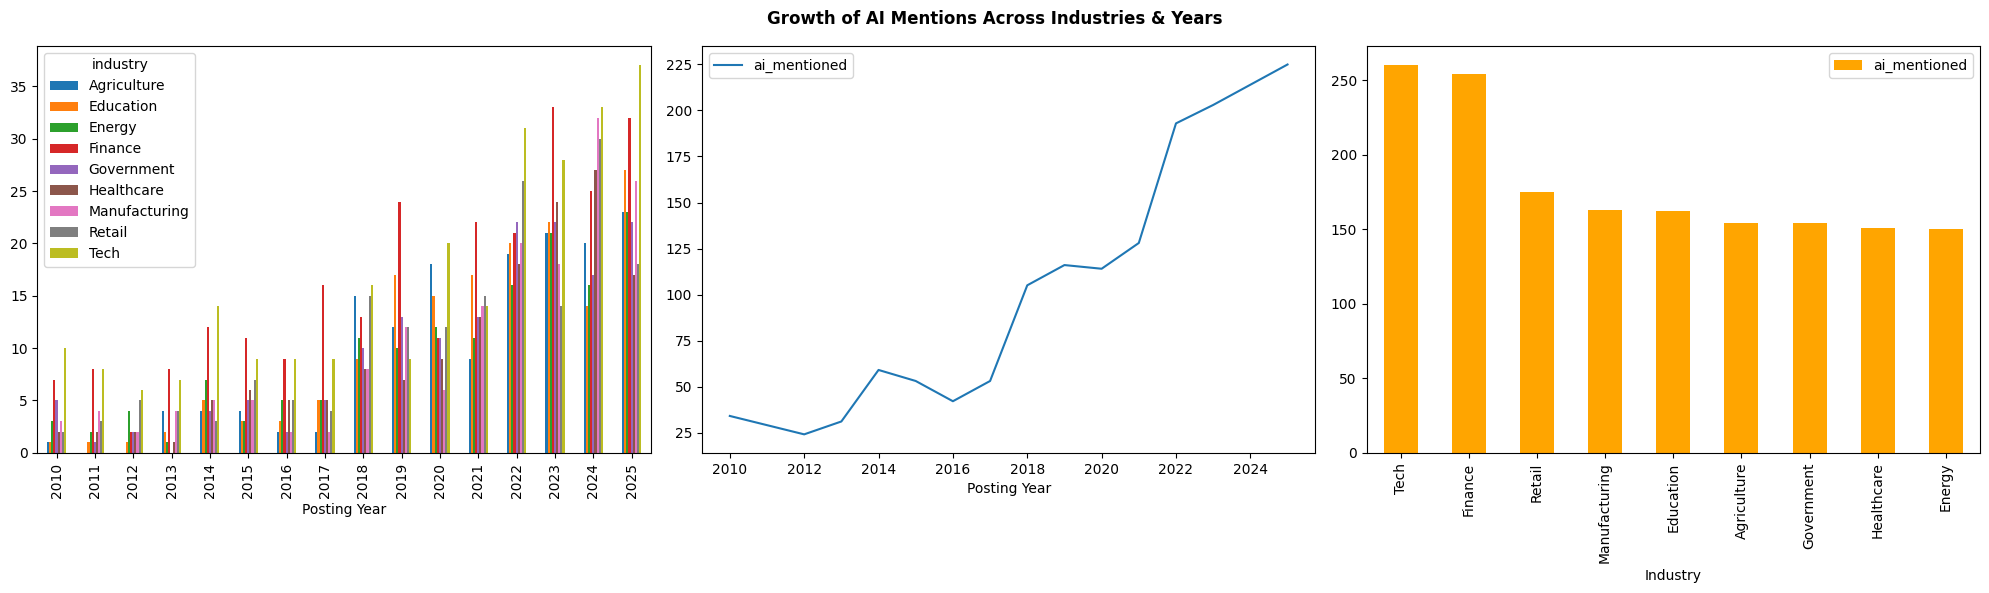

In [47]:
# Create three plots showing AI mention trends
figure, axes = plt.subplots(1, 3, figsize=(20, 6))
pivot1.plot(kind='bar', ax=axes[0])
pivot3.plot(kind='line', ax=axes[1])
pivot2.plot(kind='bar', ax=axes[2], color='orange')
axes[0].set_xlabel('Posting Year')
axes[1].set_xlabel('Posting Year')
axes[2].set_xlabel('Industry')

plt.suptitle('Growth of AI Mentions Across Industries & Years', fontweight='bold')
plt.tight_layout()
plt.show()

In [48]:
# Average AI mentions by region and industry
pivot4 = pd.pivot_table(data=df, index='region', columns = 'industry', values='ai_mentioned', aggfunc='mean')
pivot4

industry,Agriculture,Education,Energy,Finance,Government,Healthcare,Manufacturing,Retail,Tech
region,,,,,,,,,
Africa,0.272727,0.359375,0.265306,0.414286,0.297872,0.229508,0.245902,0.306452,0.516667
East Asia,0.322034,0.306452,0.316667,0.380952,0.323944,0.220000,0.262295,0.346667,0.349206
Europe,0.222222,0.310345,0.292308,0.382979,0.298246,0.314286,0.241935,0.360656,0.412698
Middle East,0.215385,0.327273,0.271186,0.553571,0.298507,0.245614,0.318841,0.320755,0.366667
North America,0.250000,0.338983,0.312500,0.500000,0.311475,0.301370,0.273973,0.260870,0.518987
Oceania,0.327586,0.305085,0.245283,0.456140,0.295082,0.269841,0.316667,0.338462,0.416667
South America,0.380282,0.240741,0.224138,0.476190,0.229730,0.318182,0.322581,0.373333,0.410256
South Asia,0.200000,0.259259,0.267857,0.421053,0.271186,0.350877,0.238806,0.166667,0.533333
Southeast Asia,0.253968,0.271429,0.379310,0.564516,0.204082,0.158730,0.344828,0.271429,0.517857


Text(0.5, 1.0, 'Regional Differences in Average AI Mentions by Industry')

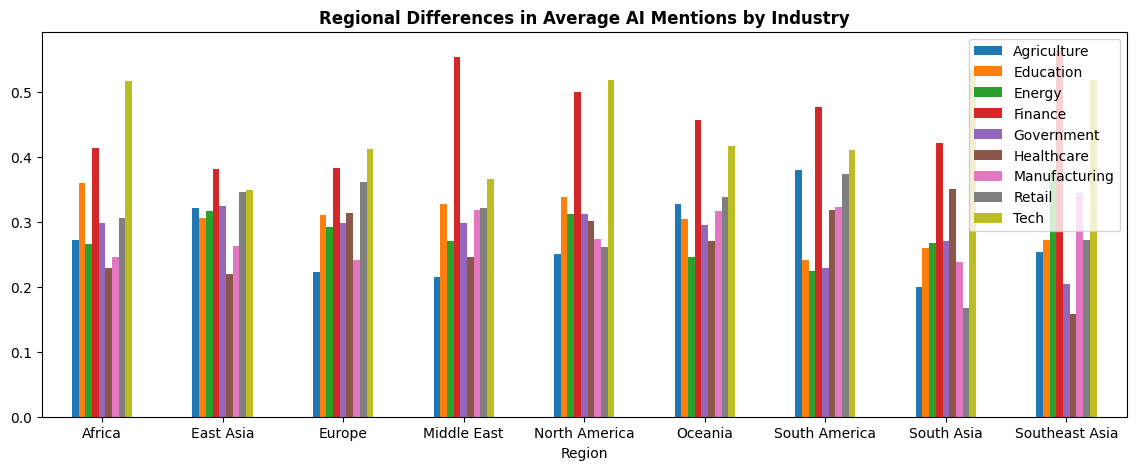

In [49]:
# Bar chart of regional AI mention differences
pivot4.plot(kind='bar', figsize=(14, 5))
plt.xticks(rotation=360)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.title('Regional Differences in Average AI Mentions by Industry', fontweight='bold')

Text(0.5, 9.444444444444438, 'Salary (USD)')

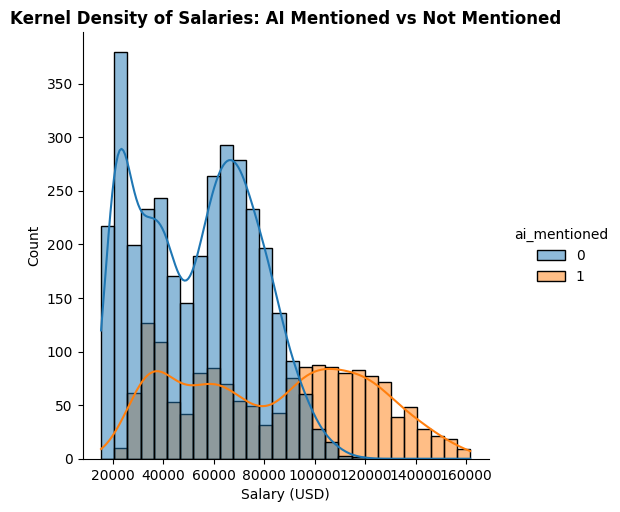

In [50]:
# Salary distribution by AI mention
sns.displot(data=df, x='salary_usd', hue='ai_mentioned', kde=True)
plt.title('Kernel Density of Salaries: AI Mentioned vs Not Mentioned', fontweight='bold')
plt.xlabel('Salary (USD)')

Text(0, 0.5, 'Salary(USD)')

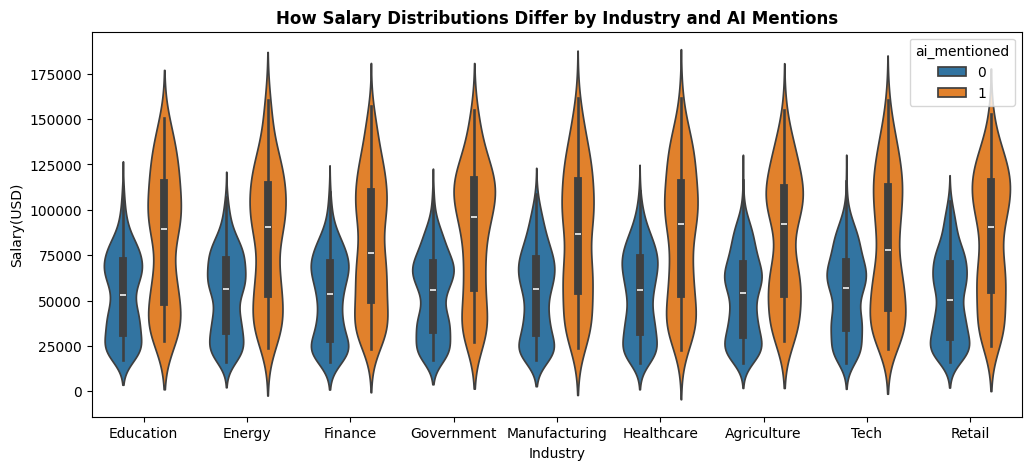

In [51]:
# Salary spread by industry and AI mention
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x='industry', y='salary_usd', hue='ai_mentioned')
plt.xlabel('Industry')
plt.title('How Salary Distributions Differ by Industry and AI Mentions', fontweight='bold')
plt.ylabel('Salary(USD)')

Text(0.5, 0.98, 'How Median Salaries Differ by Industry in AI vs Non-AI Jobs')

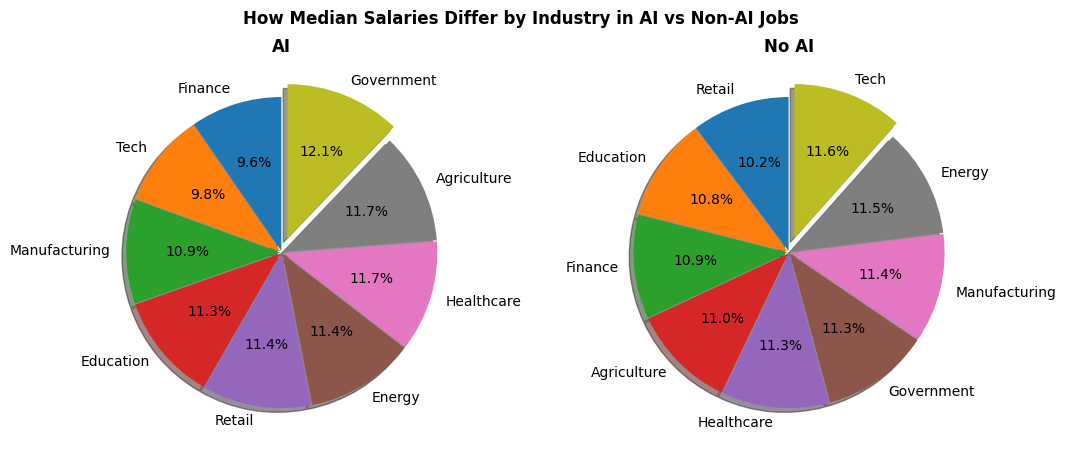

In [52]:
# Compare median salaries by industry for AI vs non-AI jobs
behaviour1 = (df.groupby(['industry', 'ai_mentioned']).agg(median_salary=('salary_usd', 'median')).reset_index())
ai_highest_industry = behaviour1[behaviour1['ai_mentioned'] == 1]
ai_highest_industry = ai_highest_industry.sort_values(by='median_salary', ascending=True)
no_ai_highest_industry = behaviour1[behaviour1['ai_mentioned'] == 0]
no_ai_highest_industry = no_ai_highest_industry.sort_values(by='median_salary', ascending=True)
figure, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].pie(ai_highest_industry['median_salary'], labels=ai_highest_industry['industry'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1])
axes[0].set_title('AI', fontweight='bold')
axes[1].set_title('No AI', fontweight='bold')
axes[1].pie(no_ai_highest_industry['median_salary'], labels=no_ai_highest_industry['industry'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1])
plt.suptitle('How Median Salaries Differ by Industry in AI vs Non-AI Jobs', fontweight='bold')

Text(0.5, 0, 'Posting Year')

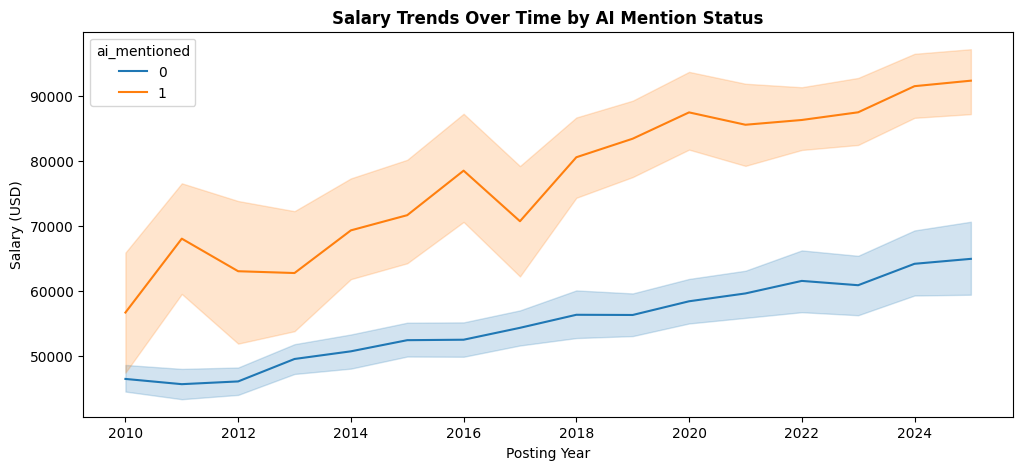

In [53]:
# Salary trends over time by AI mention
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='posting_year', y='salary_usd', hue='ai_mentioned')
plt.title('Salary Trends Over Time by AI Mention Status', fontweight='bold')
plt.ylabel('Salary (USD)')
plt.xlabel('Posting Year')

Text(0, 0.5, 'Average Salary Change')

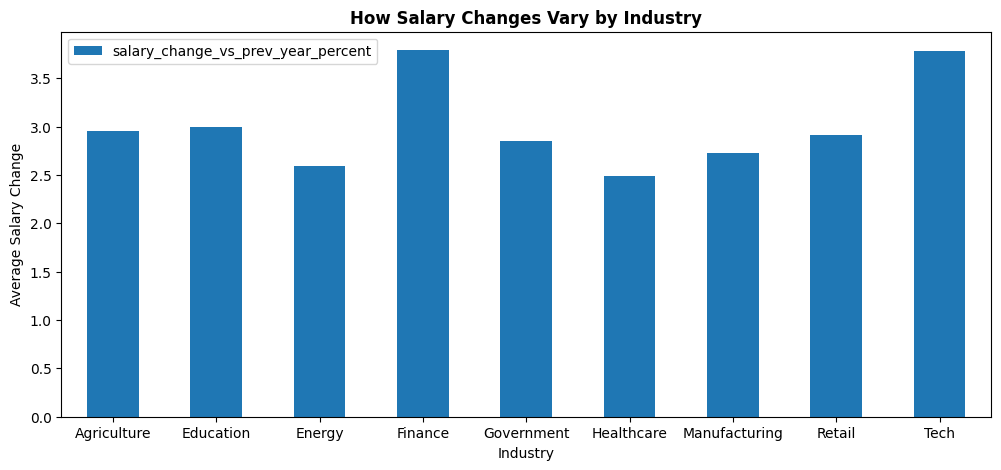

In [54]:
# Average salary change by industry
group1 = (df.groupby('industry')['salary_change_vs_prev_year_percent'].mean().reset_index())
group1 = group1.set_index('industry')
group1.plot(kind='bar', figsize=(12,5))
plt.xticks(rotation=360)
plt.xlabel('Industry')
plt.title('How Salary Changes Vary by Industry', fontweight='bold')
plt.ylabel('Average Salary Change')

In [55]:
# Top 8 AI skills for pie chart
pie1= (df['ai_skills'].value_counts().sort_values(ascending=False).head(8).reset_index(name='Counts'))
pie1

,ai_skills,Counts
0,deep learning,72
1,NLP,64
2,machine learning,61
3,reinforcement learning,60
4,MLOps,54
5,computer vision,48
6,generative AI,38
7,LLMs,33


Text(0.5, 1.0, 'Key AI Skills Required in AI-Mentioned Jobs')

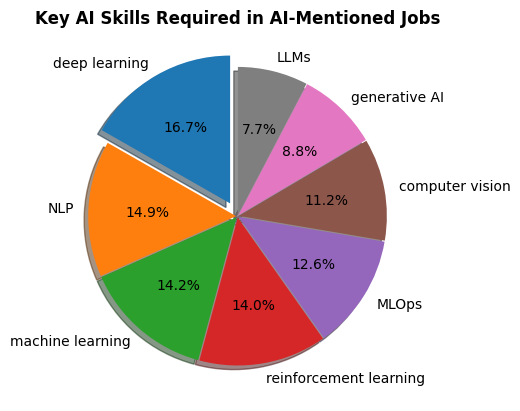

In [56]:
# Pie chart of top AI skills
plt.pie(pie1['Counts'], labels=pie1['ai_skills'], shadow=True, autopct= '%1.1f%%', startangle=90, explode=[0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
plt.title('Key AI Skills Required in AI-Mentioned Jobs', fontweight='bold')

In [57]:
# Count job listings by industry and title
group2 = (df.groupby(['industry', 'job_title']).agg(job_listings=('job_id', 'count')).reset_index())
group2

,industry,job_title,job_listings
0,Agriculture,AI Researcher,63
1,Agriculture,Business Analyst,54
2,Agriculture,Data Scientist,53
3,Agriculture,ML Engineer,65
4,Agriculture,Operations Manager,55
...,...,...,...
85,Tech,Policy Analyst,52
86,Tech,Product Manager,58
87,Tech,Research Scientist,65
88,Tech,Software Engineer,66


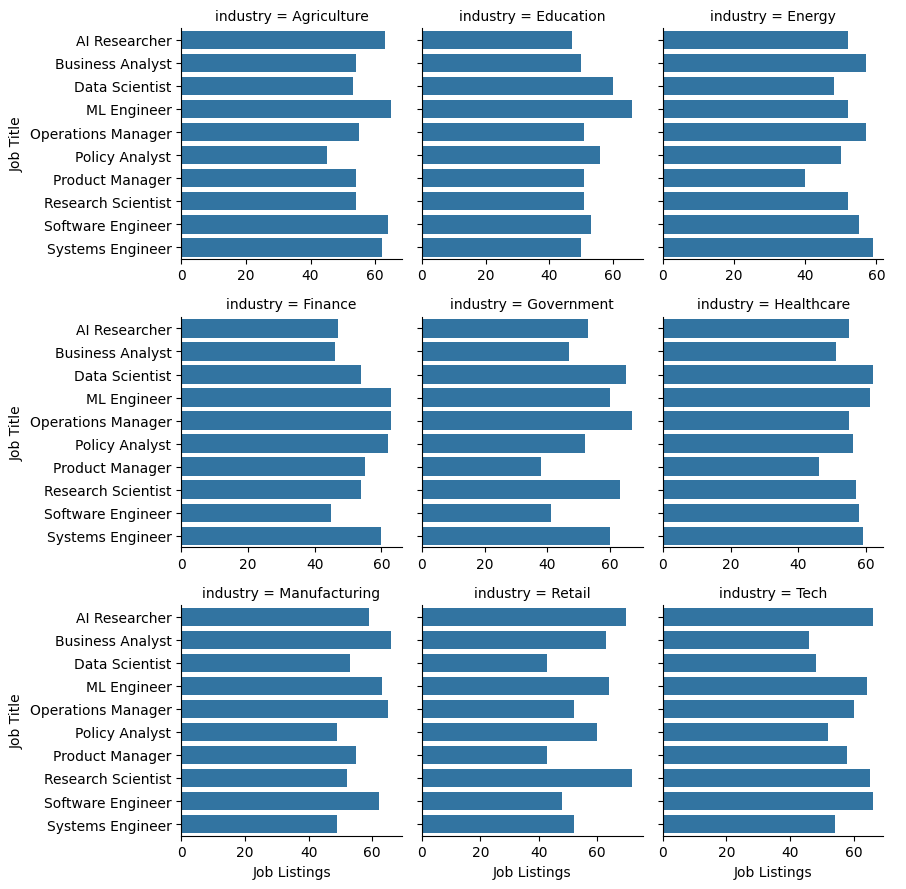

In [58]:
# Top job titles per industry
cat = sns.catplot(
    data=group2,
    x='job_listings',
    y='job_title',
    col='industry',
    col_wrap=3,
    kind='bar',
    height=3,
    sharex=False
)
cat.set_axis_labels('Job Listings', 'Job Title')

In [59]:
# Average salary by industry and job title
group3 = (df.groupby(['industry', 'job_title'])['salary_usd'].mean().reset_index().rename(columns={'salary_usd': 'Avg Salary', 'job_title': 'Job Title'}))
group3.sort_values(by='Avg Salary', ascending=False)

,industry,Job Title,Avg Salary
12,Education,Data Scientist,72168.583333
31,Finance,Business Analyst,71513.369565
84,Tech,Operations Manager,70521.333333
2,Agriculture,Data Scientist,70382.377358
24,Energy,Operations Manager,70133.649123
...,...,...,...
7,Agriculture,Research Scientist,55559.703704
19,Education,Systems Engineer,55282.540000
26,Energy,Product Manager,54880.250000
1,Agriculture,Business Analyst,52602.481481


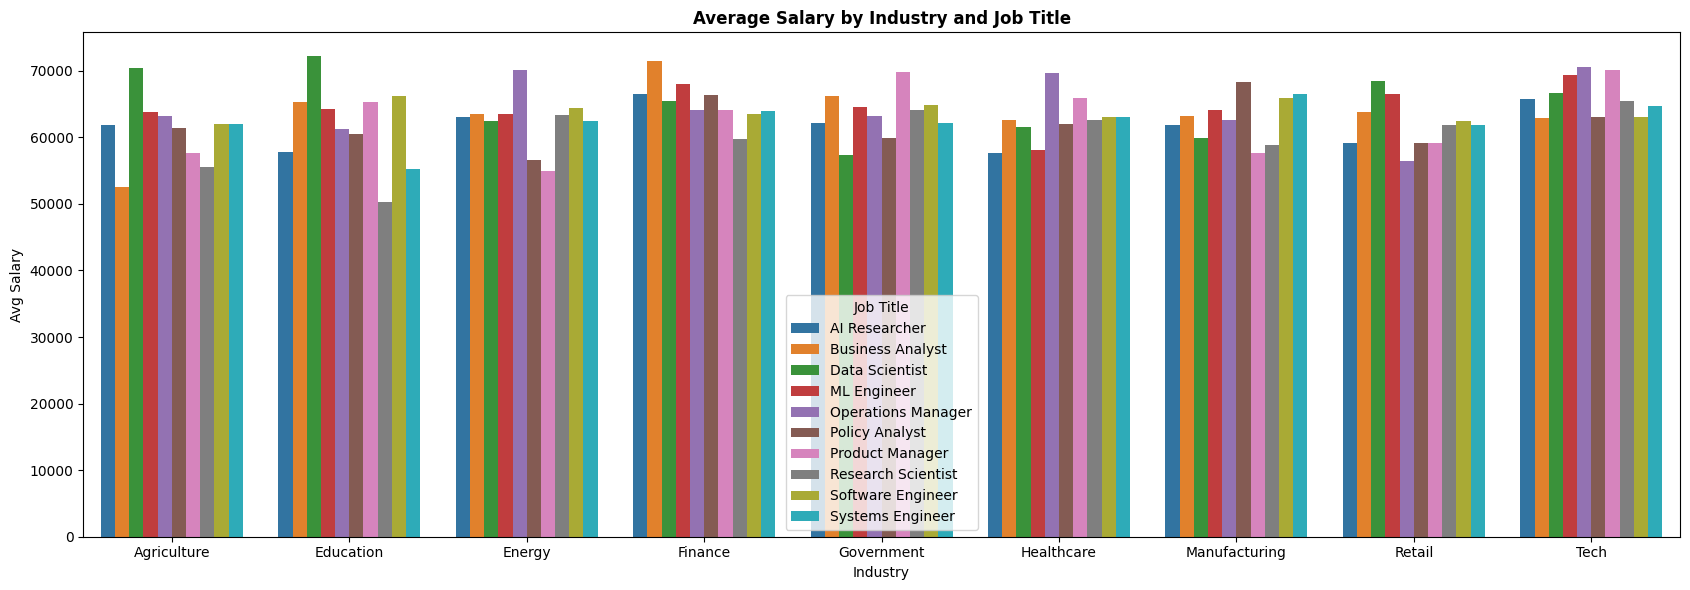

In [60]:
# Compare average salaries across industries and roles
plt.figure(figsize=(17, 6))
sns.barplot(data=group3, y='Avg Salary', x='industry', hue='Job Title')
plt.title('Average Salary by Industry and Job Title', fontweight='bold')
plt.xlabel('Industry')
plt.tight_layout()

In [61]:
# Rank job titles by frequency
df['job_title'].value_counts().sort_values(ascending=False)

job_title
ML Engineer           558
Operations Manager    525
Research Scientist    520
AI Researcher         512
Systems Engineer      505
Software Engineer     492
Data Scientist        486
Policy Analyst        482
Business Analyst      480
Product Manager       440
Name: count, dtype: int64

In [62]:
# AI mention rate by job title
rate1 = (df.groupby('job_title')['ai_mentioned'].mean().reset_index().rename(columns={'ai_mentioned': 'AI Mentioned Rate'}))
rate1 = rate1.sort_values(by='AI Mentioned Rate', ascending=False)
rate1

,job_title,AI Mentioned Rate
4,Operations Manager,0.354286
3,ML Engineer,0.342294
1,Business Analyst,0.325000
8,Software Engineer,0.323171
6,Product Manager,0.322727
5,Policy Analyst,0.321577
7,Research Scientist,0.321154
0,AI Researcher,0.318359
9,Systems Engineer,0.308911
2,Data Scientist,0.304527


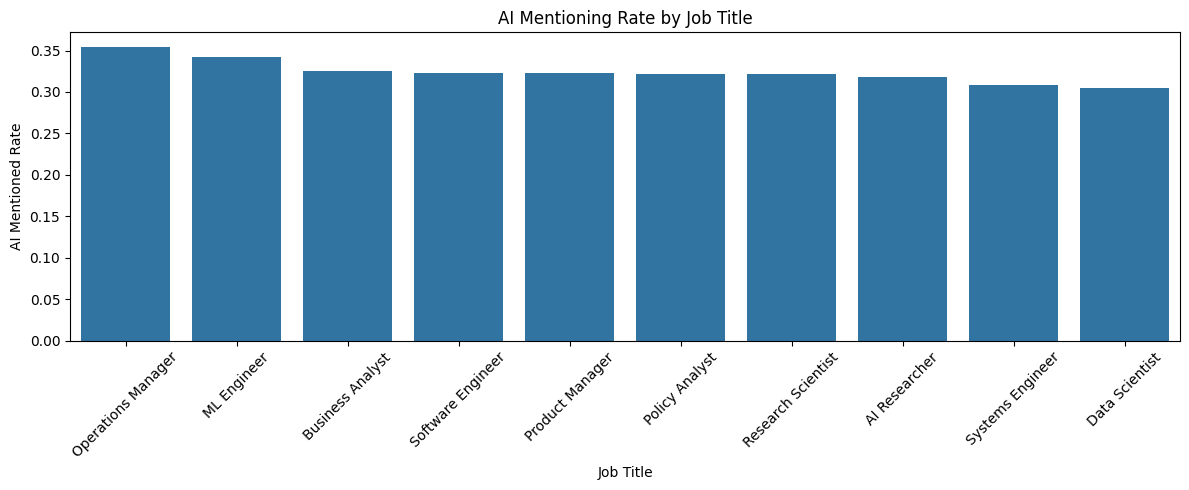

In [63]:
# Visualize AI mention rate by job title
plt.figure(figsize=(12,5))
sns.barplot(data=rate1, x='job_title', y='AI Mentioned Rate')
plt.xticks(rotation=45)
plt.xlabel('Job Title')
plt.title('AI Mentioning Rate by Job Title')
plt.tight_layout()

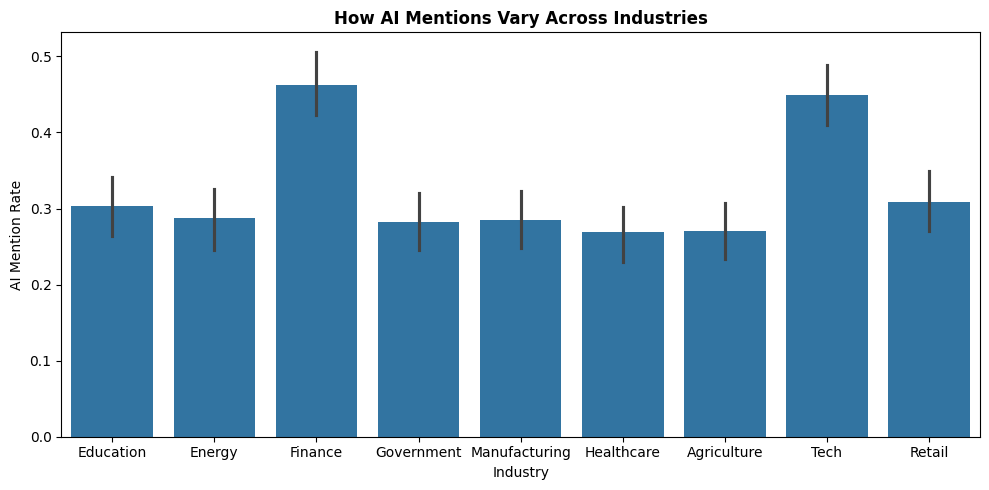

In [64]:
# AI mention rate by industry
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='industry', y='ai_mentioned')
plt.ylabel('AI Mention Rate')
plt.xlabel('Industry')
plt.title('How AI Mentions Vary Across Industries', fontweight='bold')
plt.tight_layout()

In [65]:
# Top countries by AI mentioning rate
group4 = (df.groupby('country')['ai_mentioned'].mean().reset_index().rename(columns={'country': 'Country', 'ai_mentioned':'AI Mentioning Rate'}))
group4['AI Mentioning Rate'] = group4['AI Mentioning Rate'] * 100
group4 = group4.sort_values(by='AI Mentioning Rate', ascending = False).head(10)
group4

,Country,AI Mentioning Rate
23,Netherlands,41.333333
5,Chile,40.336134
11,Ghana,38.709677
32,Singapore,38.554217
13,Indonesia,37.931034
4,Canada,37.837838
18,Kenya,36.363636
20,Mexico,36.269430
6,China,35.766423
24,New Zealand,35.686275


Text(0.5, 1.0, 'Top 10 Countries by AI Mention Rate in Job Postings')

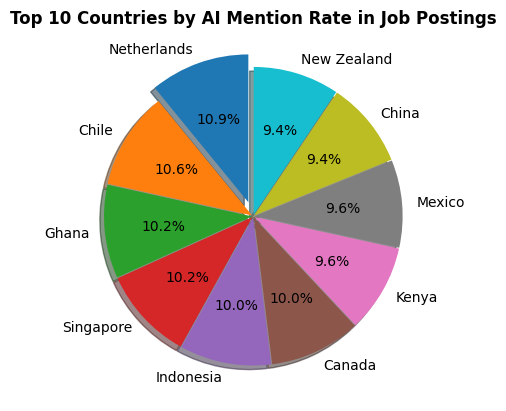

In [66]:
# Pie chart of top AI-mentioning countries
plt.pie(group4['AI Mentioning Rate'], labels=group4['Country'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
plt.title('Top 10 Countries by AI Mention Rate in Job Postings', fontweight='bold')

Text(0.5, 1.0, 'Companies with the Most Job Listings')

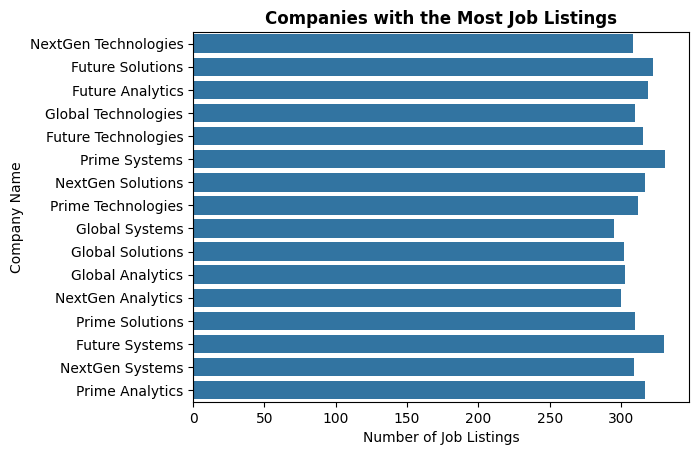

In [67]:
# Count job listings per company
sns.countplot(df['company_name'])
plt.ylabel('Company Name')
plt.xlabel('Number of Job Listings')
plt.title('Companies with the Most Job Listings', fontweight='bold')

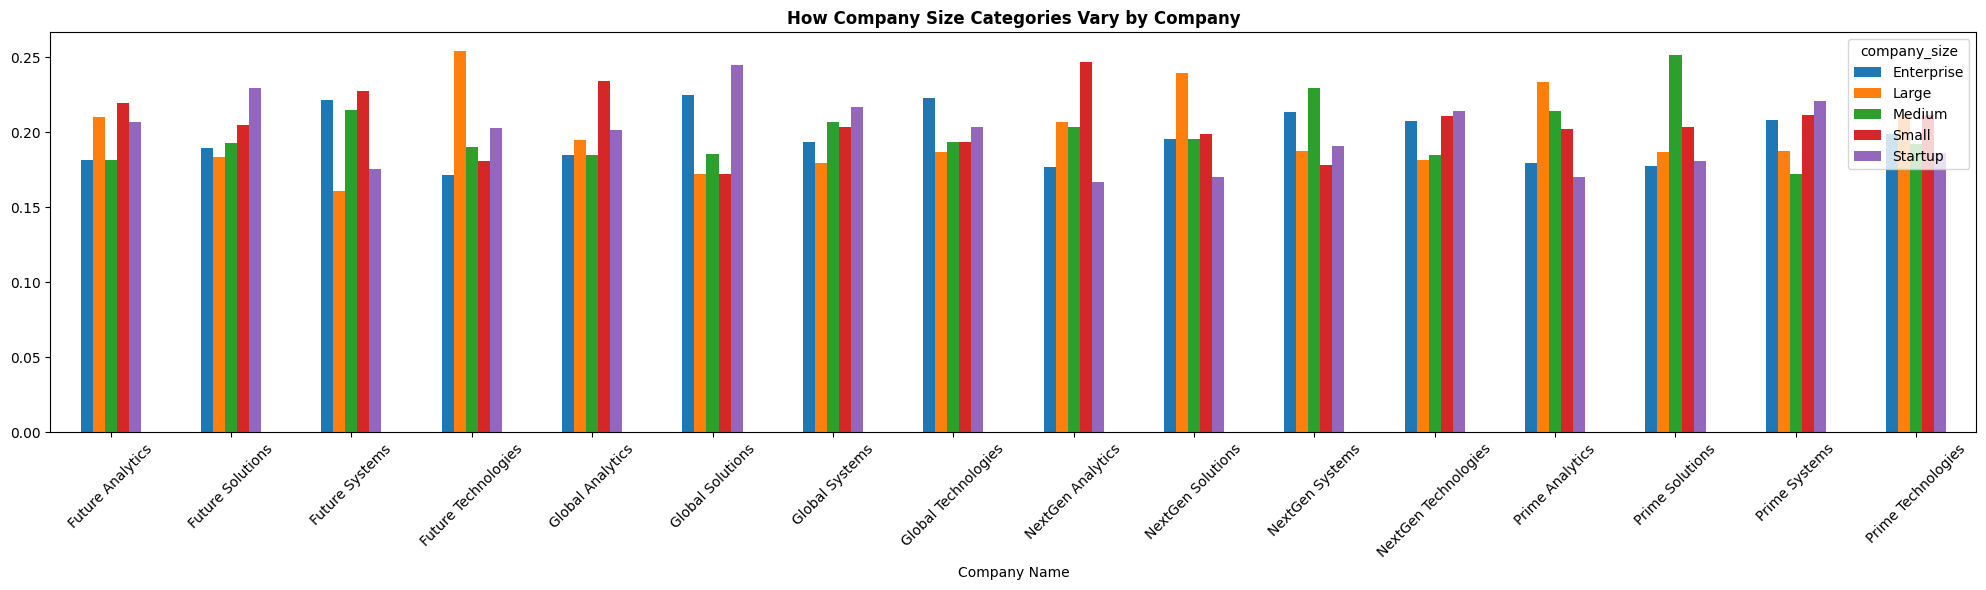

In [68]:
# Company size distribution per company
crosstab1 = pd.crosstab(df['company_name'], df['company_size'], normalize='index')
crosstab1.plot(kind='bar', figsize=(20, 6))
plt.title('How Company Size Categories Vary by Company', fontweight='bold')
plt.xlabel('Company Name')
plt.xticks(rotation=45)
plt.tight_layout()

In [69]:
# Job metrics grouped by displacement risk
behaviour1 = (df.groupby('ai_job_displacement_risk').agg(ai_mentioning_rate=('ai_mentioned', 'mean'), avg_ai_intensity_score=('ai_intensity_score', 'mean'), avg_salary = ('salary_usd', 'mean'), avg_automation_risk_score=('automation_risk_score', 'mean'), reskilling_rate = ('reskilling_required', 'mean'), unique_jobs = ('ai_job_displacement_risk', 'count')))
behaviour1

,ai_mentioning_rate,avg_ai_intensity_score,avg_salary,avg_automation_risk_score,reskilling_rate,unique_jobs
ai_job_displacement_risk,,,,,,
High,0.331285,29.350953,64117.086663,58.262446,33.128457,1627
Low,0.324214,28.850407,63082.830035,58.392899,32.421420,1718
Medium,0.318429,27.998187,62106.418127,59.200000,31.842900,1655


Text(0.5, 0, 'Industry AI Adoption Stage')

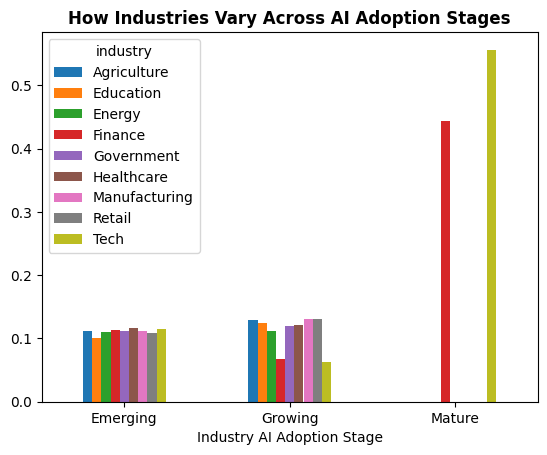

In [70]:
# Industry distribution across AI adoption stages
crosstab2 = pd.crosstab(df['industry_ai_adoption_stage'], df['industry'], normalize='index')
crosstab2.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('How Industries Vary Across AI Adoption Stages', fontweight='bold')
plt.xlabel('Industry AI Adoption Stage')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Lead'),
  Text(1, 0, 'Executive'),
  Text(2, 0, 'Junior'),
  Text(3, 0, 'Mid'),
  Text(4, 0, 'Senior'),
  Text(5, 0, 'Intern')])

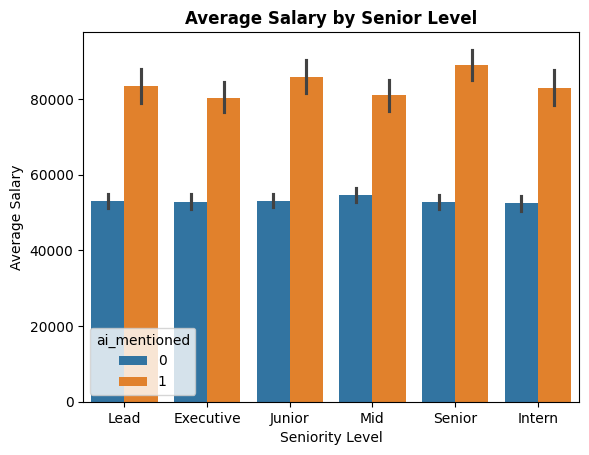

In [71]:
# Salary by seniority and AI mention
group5 = (df.groupby(['seniority_level', 'ai_mentioned'])['salary_usd'].mean().reset_index())
group5 = group5.set_index('seniority_level')
sns.barplot(data=df, x='seniority_level', y='salary_usd', hue='ai_mentioned')
plt.title('Average Salary by Senior Level', fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=360)

<Axes: >

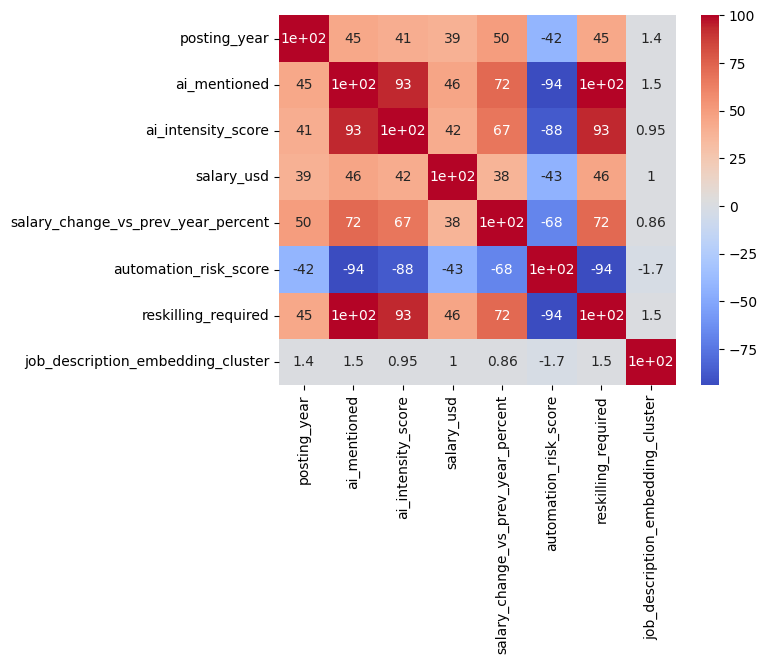

In [72]:
# Correlation heatmap of numeric features
df_corr = df.corr(numeric_only=True) * 100
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

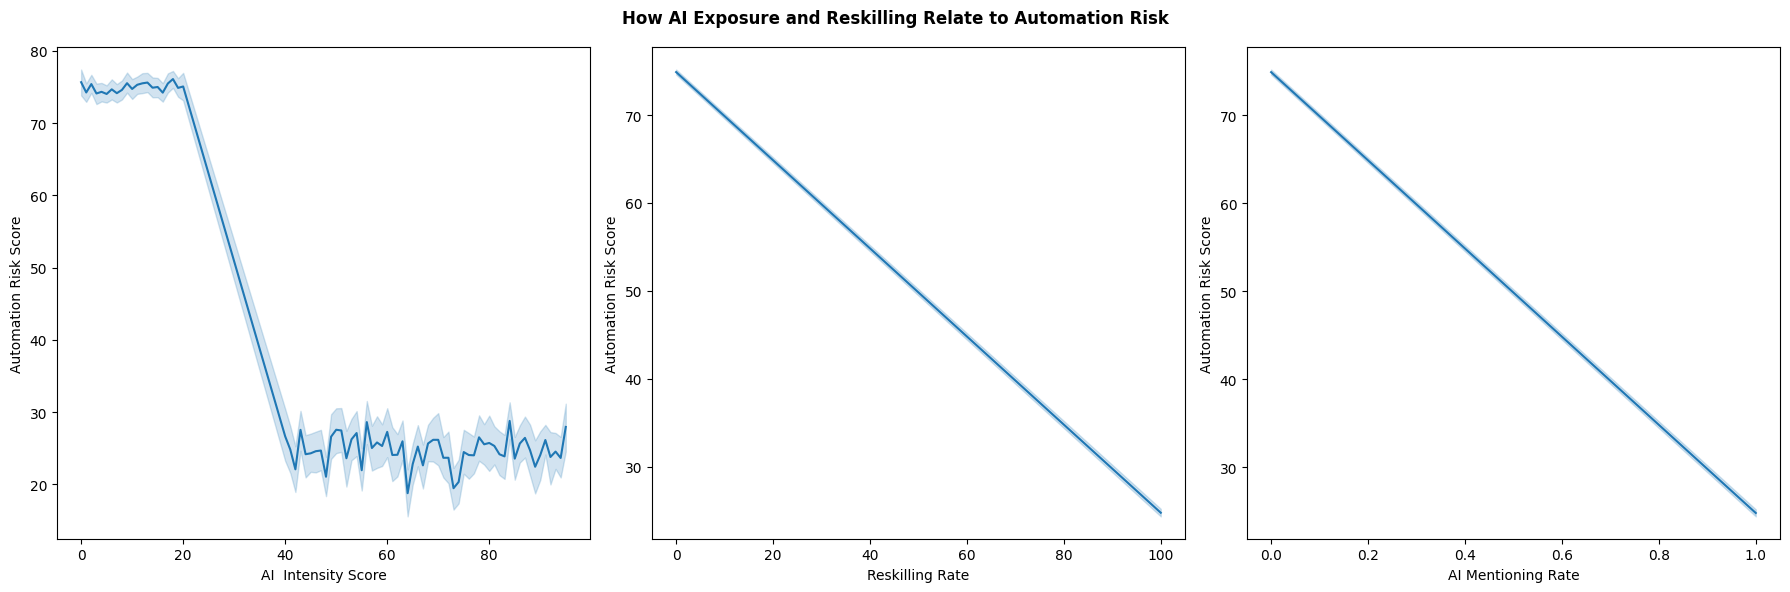

In [73]:
# Relationships between AI exposure, reskilling, and automation risk
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.lineplot(data=df,  x='ai_intensity_score', y='automation_risk_score', ax=axes[0])
axes[0].set_ylabel('Automation Risk Score')
axes[0].set_xlabel('AI  Intensity Score')
sns.lineplot(data=df, x='reskilling_required', y='automation_risk_score', ax=axes[1])
axes[1].set_xlabel('Reskilling Rate')
axes[1].set_ylabel('Automation Risk Score')
sns.lineplot(data=df, x='ai_mentioned', y='automation_risk_score', ax=axes[2])
axes[2].set_ylabel('Automation Risk Score')
axes[2].set_xlabel('AI Mentioning Rate')

plt.suptitle('How AI Exposure and Reskilling Relate to Automation Risk', fontweight='bold')
plt.tight_layout()


Text(0.5, 0, 'AI Intensity Score')

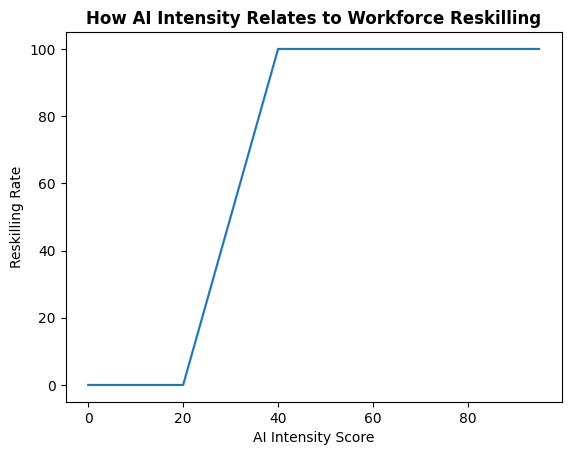

In [74]:
# AI intensity vs reskilling need
sns.lineplot(data=df, x='ai_intensity_score', y='reskilling_required')
plt.title('How AI Intensity Relates to Workforce Reskilling', fontweight='bold')
plt.ylabel('Reskilling Rate')
plt.xlabel('AI Intensity Score')

Text(0.5, 0.98, 'How Salary Growth and AI Intensity Have Evolved Over Time')

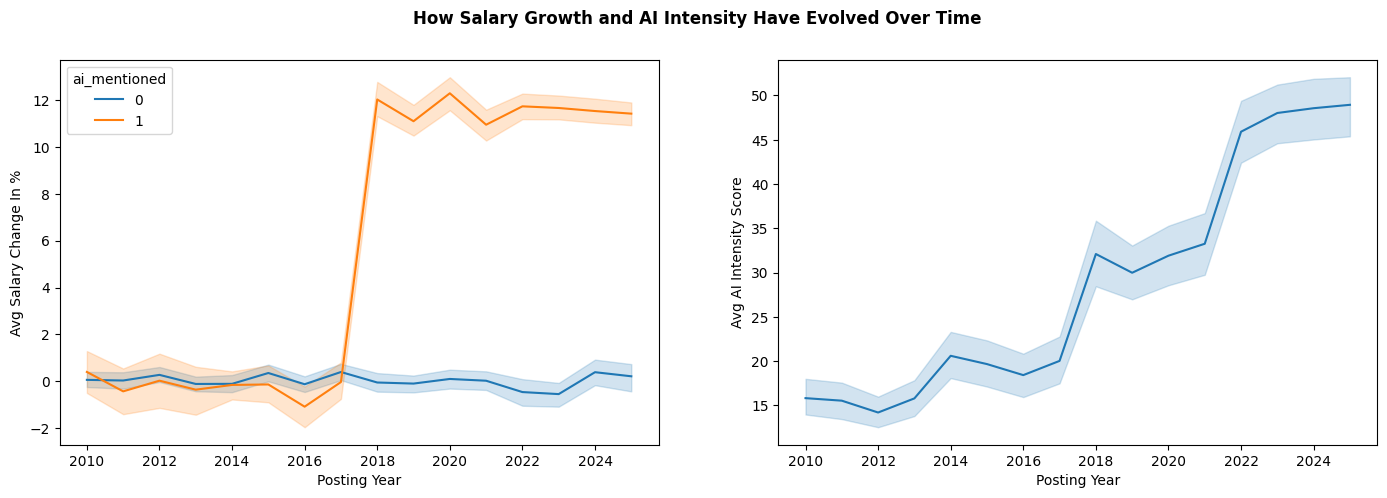

In [75]:
# Salary growth and AI intensity trends over time
figure, axes = plt.subplots(1, 2, figsize=(17, 5))
sns.lineplot(data=df, x='posting_year', y='salary_change_vs_prev_year_percent', hue='ai_mentioned', ax=axes[0])
axes[0].set_ylabel('Avg Salary Change In %')
axes[0].set_xlabel('Posting Year')
sns.lineplot(data=df, x='posting_year', y='ai_intensity_score', ax=axes[1])
axes[1].set_ylabel('Avg AI Intensity Score')
axes[1].set_xlabel('Posting Year')
plt.suptitle('How Salary Growth and AI Intensity Have Evolved Over Time', fontweight='bold')


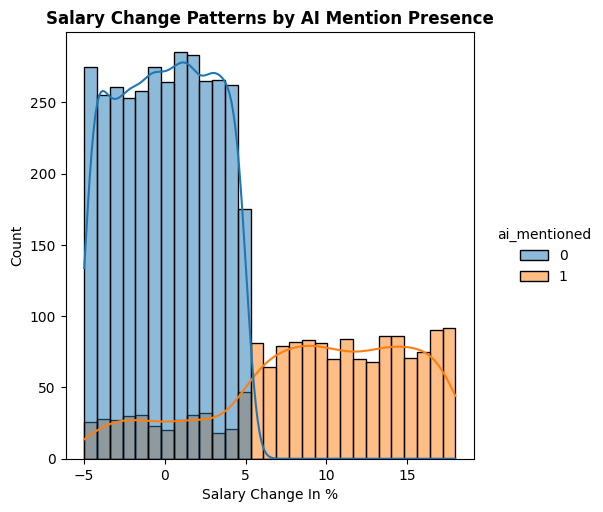

In [76]:
# Salary change distribution by AI mention
sns.displot(data=df, x='salary_change_vs_prev_year_percent', kde=True, hue='ai_mentioned')
plt.xlabel('Salary Change In %')
plt.title('Salary Change Patterns by AI Mention Presence', fontweight='bold')
sns.despine(right=False, top=False)

Text(0.5, 1.0, 'How Job Roles Have Changed Over Time')

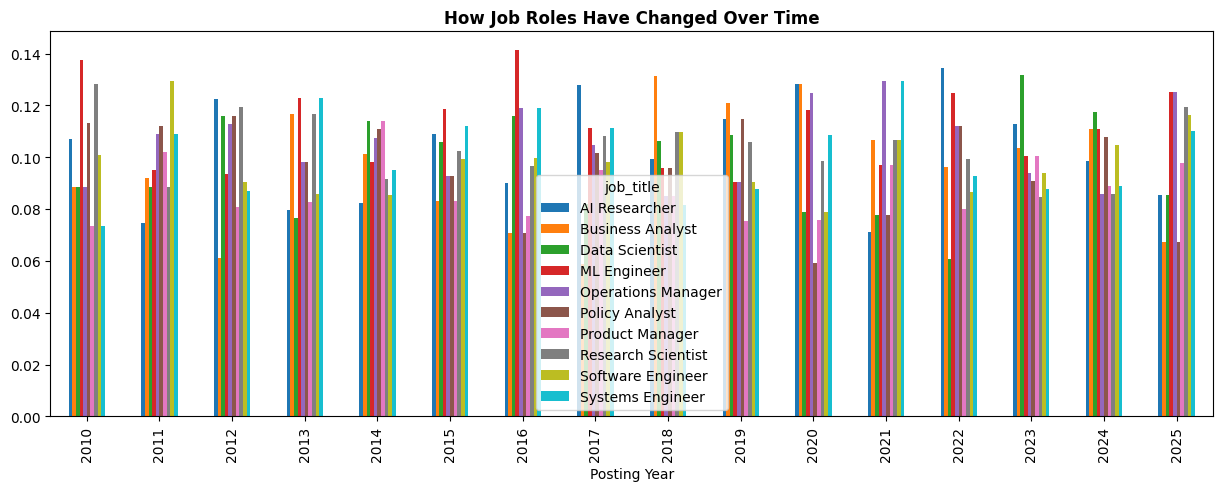

In [77]:
# Job title distribution over time
crosstab3 = pd.crosstab(df['posting_year'], df['job_title'], normalize='index')
crosstab3.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Posting Year')
plt.title('How Job Roles Have Changed Over Time', fontweight='bold')

Text(0, 0.5, 'Job Count')

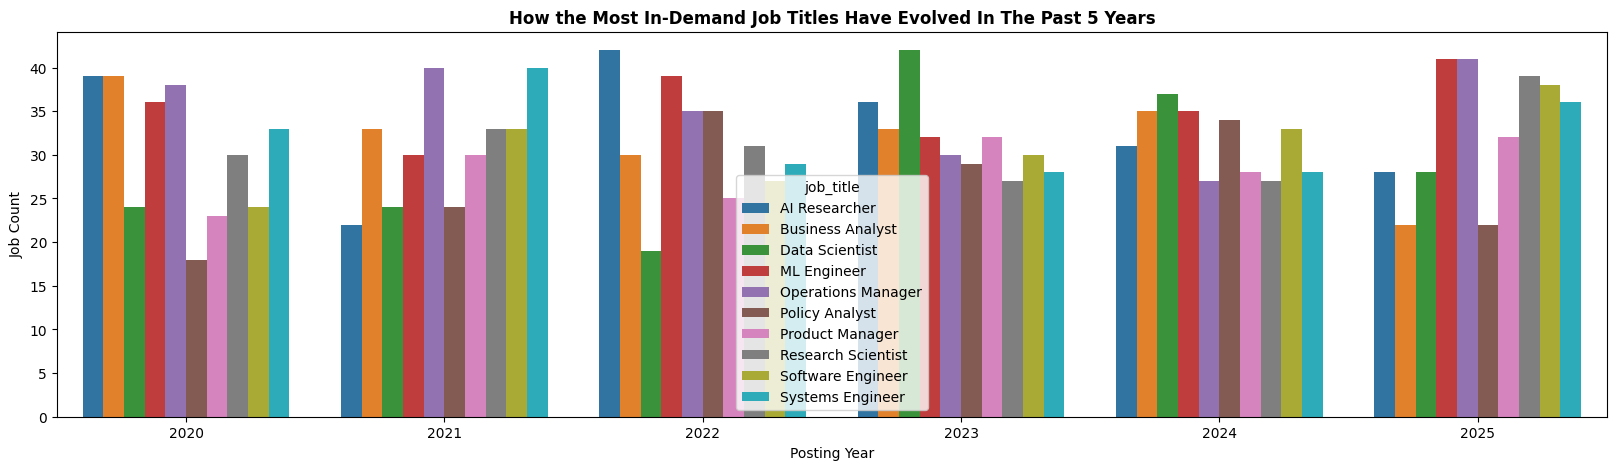

In [78]:
# Job demand trends since 2020
group6 = (df.groupby(['posting_year', 'job_title']).agg(job_count=('job_id', 'count')).reset_index())
group6_2020 = group6[group6['posting_year'] >= 2020]
plt.figure(figsize=(20,5))
sns.barplot(data=group6_2020, x='posting_year', y='job_count', hue='job_title')
plt.title('How the Most In-Demand Job Titles Have Evolved In The Past 5 Years', fontweight='bold')
plt.xlabel('Posting Year')
plt.ylabel('Job Count')

In [79]:
# Industry-level AI, salary, and risk metrics
behaviour2 = (df.groupby('industry').agg(ai_mentioning_rate=('ai_mentioned', 'mean'), avg_ai_intensity_score=('ai_intensity_score', 'mean'), median_salary=('salary_usd', 'median'), avg_salary_change=('salary_change_vs_prev_year_percent', 'mean'), avg_automation_risk_score=('automation_risk_score', 'mean'), reskilling_rate=('reskilling_required', 'mean'))).reset_index()
behaviour2

,industry,ai_mentioning_rate,avg_ai_intensity_score,median_salary,avg_salary_change,avg_automation_risk_score,reskilling_rate
0,Agriculture,0.270650,25.947276,59460.0,2.954200,61.813708,27.065026
1,Education,0.302804,26.676636,60168.0,2.997738,59.545794,30.280374
2,Energy,0.287356,27.526820,60257.5,2.589559,60.413793,28.735632
3,Finance,0.462659,36.570128,62775.0,3.792204,51.258652,46.265938
4,Government,0.282051,26.467033,62205.5,2.856154,61.221612,28.205128
5,Healthcare,0.269643,25.600000,60926.5,2.489429,61.039286,26.964286
6,Manufacturing,0.284468,25.781850,61501.0,2.730576,60.532286,28.446771
7,Retail,0.308642,27.975309,59600.0,2.913086,59.751323,30.864198
8,Tech,0.449050,35.841105,61988.0,3.778377,52.174439,44.905009


In [80]:
# Correlation between AI mention rate and reskilling rate
behaviour2['ai_mentioning_rate'].corr(behaviour2['reskilling_rate'])

np.float64(1.0)

In [81]:
# Perfect positive correlation (value = 1)

In [82]:
# View unique regions
df['region'].unique()

<StringArray>
[ 'South America',    'Middle East',     'South Asia',         'Europe',
      'East Asia',        'Oceania',         'Africa',  'North America',
 'Southeast Asia']
Length: 9, dtype: str

In [83]:
# Region-level AI, salary, and risk metrics
behaviour3 = (df.groupby('region').agg(ai_mentioning_rate=('ai_mentioned', 'mean'), avg_ai_intensity_score=('ai_intensity_score', 'mean'), median_salary=('salary_usd', 'median'), avg_salary_change=('salary_change_vs_prev_year_percent', 'mean'), avg_automation_risk_score=('automation_risk_score', 'mean'), reskilling_rate=('reskilling_required', 'mean'))).reset_index()
behaviour3


,region,ai_mentioning_rate,avg_ai_intensity_score,median_salary,avg_salary_change,avg_automation_risk_score,reskilling_rate
0,Africa,0.327032,29.655955,22991.0,3.195312,58.396975,32.703214
1,East Asia,0.317376,28.294326,69833.5,2.932252,59.195035,31.737589
2,Europe,0.311712,28.136937,75946.0,2.836126,59.464865,31.171171
3,Middle East,0.321627,27.852126,62950.0,2.873678,58.530499,32.162662
4,North America,0.350427,30.777778,91253.0,3.224991,57.162393,35.042735
5,Oceania,0.330224,28.371269,84514.5,3.287687,58.402985,33.022388
6,South America,0.334443,28.833611,44942.0,2.982496,58.452579,33.444260
7,South Asia,0.298148,27.318519,25633.5,2.759241,60.127778,29.814815
8,Southeast Asia,0.327869,29.204007,38990.0,3.045264,57.921676,32.786885


Text(0.5, 0, 'Median Salary')

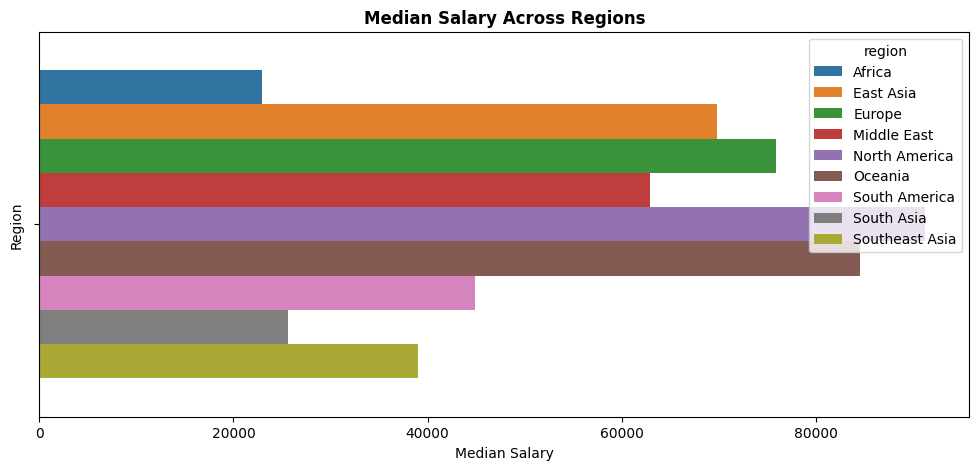

In [84]:
# Compare median salaries by region
plt.figure(figsize=(12,5))
sns.barplot(data=behaviour3, x='median_salary', hue='region')
plt.title('Median Salary Across Regions', fontweight='bold')
plt.ylabel('Region')
plt.xlabel('Median Salary')


Text(0.5, 1.0, 'AI Mentioning Rates Across Regions')

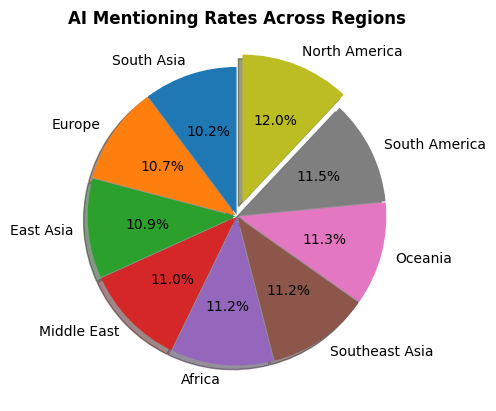

In [85]:
# Pie chart of AI mentioning rates by region
pie2 = behaviour3[['region', 'ai_mentioning_rate' ]]
pie2 = pie2.sort_values(by='ai_mentioning_rate', ascending=True)
plt.pie(pie2['ai_mentioning_rate'], labels=pie2['region'], autopct='%1.1f%%', startangle=90, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1], shadow=True)
plt.title('AI Mentioning Rates Across Regions', fontweight='bold')

Text(0.5, 1.0, 'Where Salaries Are Growing the Most by Region')

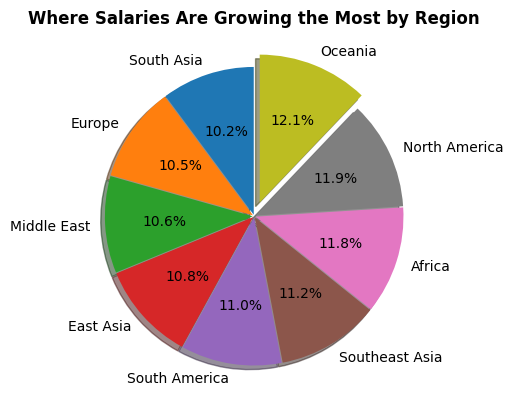

In [86]:
# Pie chart of salary growth by region
pie3 = behaviour3[['region', 'avg_salary_change' ]]
pie3 = pie3.sort_values(by='avg_salary_change', ascending=True)
plt.pie(pie3['avg_salary_change'], labels=pie3['region'], autopct='%1.1f%%', startangle=90, explode=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1], shadow=True)
plt.title('Where Salaries Are Growing the Most by Region', fontweight='bold')

Text(0.5, 1.0, 'How Company Size Composition Varies by Region')

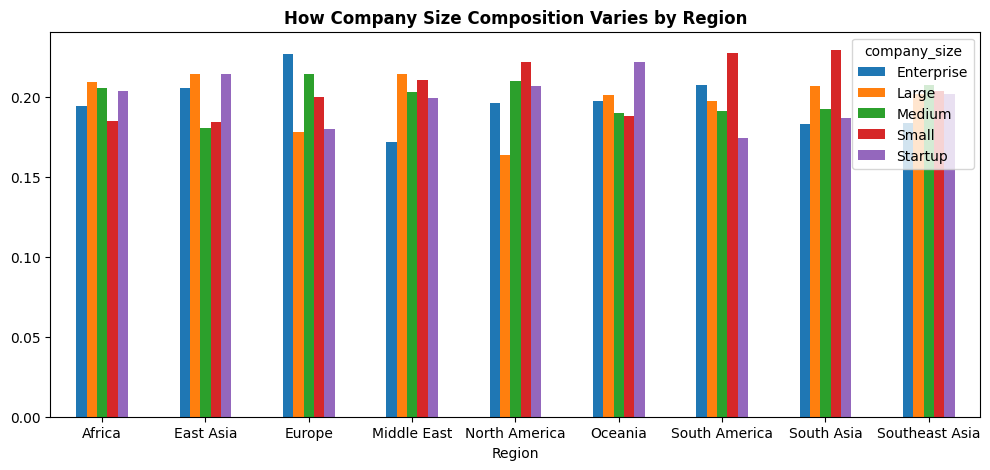

In [87]:
# Company size distribution by region
crosstab4 = pd.crosstab(df['region'], df['company_size'], normalize='index')
crosstab4.plot(kind='bar', figsize=(12, 5))
plt.xticks(rotation=360)
plt.xlabel('Region')
plt.title('How Company Size Composition Varies by Region', fontweight='bold')

Text(0.5, 0, 'Posting Year')

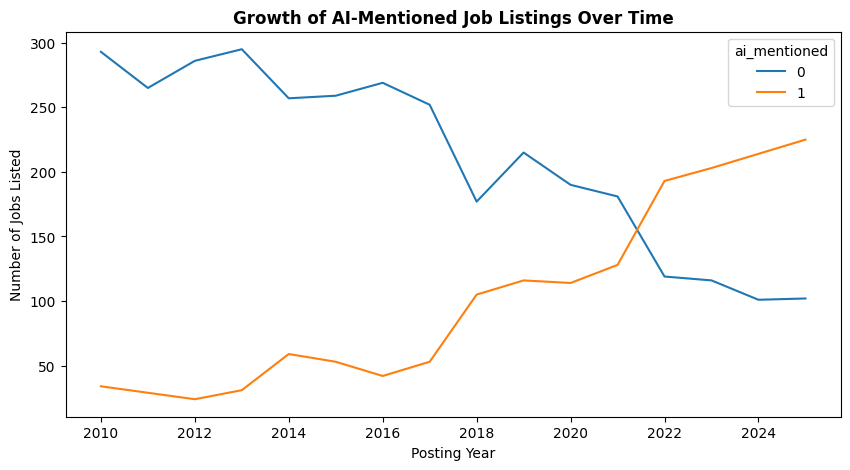

In [88]:
# Trend of AI vs non-AI job listings over time
group7 = (df.groupby(['posting_year', 'ai_mentioned'])['job_id'].count().reset_index())
plt.figure(figsize=(10,5))
sns.lineplot(data=group7, x='posting_year', y='job_id', hue='ai_mentioned')
plt.ylabel('Number of Jobs Listed')
plt.title('Growth of AI-Mentioned Job Listings Over Time', fontweight='bold')
plt.xlabel('Posting Year')


In [ ]:
# Save cleaned dataset to CSV
df.to_csv('../data/ai_impact_jobs_cleaned.csv', index=False)

# **INSIGHTS AND CONCLUSIONS**

# 🤖 AI 및 ML 채용 시장 분석 보고서 (2025)

## 1. 전년 대비 패턴 (Year-over-Year Patterns)
* **AI 기술 수요 확산**: AI 기술에 대한 수요가 전반적으로 확대되고 있으며, 금융과 기술 산업이 도입 단계에 따라 주도권 경쟁을 벌이고 있습니다.
* **급여 성장세**: AI 관련 직무는 시간이 지남에 따라 비(非) AI 직무보다 빠른 급여 성장과 높은 보수 수준을 보여줍니다.
* **2018년의 전환점**: 2018년의 급격한 수요 증가는 AI 기술이 실질적인 임금 프리미엄을 받기 시작한 명확한 **변곡점**임을 나타냅니다.
* **주도 직무의 변화**: 특정 직무가 매년 시장을 독점하지 않으며, 시기에 따라 서로 다른 직종들이 채용 공고를 주도합니다.
* **역전 현상**: AI 관련 채용 공고는 꾸준히 상승하여 **2022년에 이르러 비 AI 공고 수를 추월**했습니다.

---

## 2. 보상 체계 개요 (Compensation Overview)
* **급여 분포**: AI 직무의 급여는 더 높고 고르게 분포된 반면, 비 AI 직무는 낮은 급여 쪽으로 편향되어 있습니다.
* **산업별 중앙값**:
    * **AI 직무**: 정부 및 농업 분야가 가장 높은 중앙값 급여를 제공합니다.
    * **비 AI 직무**: 기술과 에너지 분야가 선두지만, AI 직무보다는 낮은 수준입니다.
* **성장 동력**: 금융과 기술 산업에서 보상 성장이 가장 두드러지며 이는 지속적인 투자와 수요를 반영합니다. 반면 의료 분야는 상대적으로 급여 정체 현상을 보입니다.
* **직무별 고점**:
    * **데이터 사이언티스트**: 농업 산업에서 가장 높은 수익
    * **ML 엔지니어**: 기술 산업에서 가장 높은 수익
    * **비즈니스 분석가**: 금융 분야에서 가장 높은 수익
* **숙련도 및 인턴 급여**: AI 직무 급여는 시니어 단계에서 정점을 찍는 반면, 비 AI 직무는 미드(Mid) 레벨에서 정점을 찍습니다. 
    > **참고**: AI 인턴($80,000)은 비 AI 인턴($55,000)보다 훨씬 높은 수입을 올립니다.
* **지역별 격차**: 북미(약 $91k)와 아프리카(약 $23k) 사이에는 **약 4배**에 달하는 극심한 지역 간 격차가 존재합니다.

---

## 3. 직무 역할 개요 (Job Role Overview)
* **핵심 기술**: 딥러닝(Deep Learning), 자연어 처리(NLP), 머신러닝(ML)이 AI 관련 채용 공고에서 가장 흔하게 요구되는 필수 기술입니다.
* **AI 통합 가속화**: 운영 관리자, ML 엔지니어, 비즈니스 분석가 직무에서 AI 언급 빈도가 가장 높으며, 이는 해당 직무 내에서 AI 책임이 강력하게 통합되고 있음을 나타냅니다.

---

## 4. 채용 공고 내 AI 언급 현황 (AI Mentions)
* **도입 선두**: 기술과 금융 산업이 AI 도입을 지속적으로 주도하고 있습니다.
* **국가별 특징**: 네덜란드, 칠레, 가나의 채용 공고에서 AI 언급 빈도가 가장 높게 나타납니다.
* **상관관계**: AI 언급 빈도가 높을수록 **자동화 위험은 낮아지고, 급여 성장률과 AI 집약도는 높아지는** 경향이 있습니다.
* **지역별 빈도**: 북미, 남미, 오세아니아의 채용 공고가 타 지역에 비해 AI 언급 빈도가 가장 높습니다.

---

## 5. 산업별 분석 (Industry-Level Analysis)
* **지역별 주도 산업**:
    * **중동/동남아시아**: 금융 산업이 AI 언급 주도
    * **남아시아/북미/아프리카**: 기술 산업이 AI 언급 주도
* **성숙도**: 금융과 기술 산업은 **AI 도입의 성숙 단계(Mature stage)**에 도달한 유일한 산업군입니다.

1. **Year-over-Year Patterns**
 - Demand for AI skills is expanding broadly, while finance and technology compete for dominance at different stages of adoption
 - AI-related roles show faster salary growth and higher pay than non-AI roles over time
 - The 2018 surge represents a clear inflection point where AI skills began commanding a substantial compensation premium.
 - No single job role consistently dominates job listings over the years, with different titles leading in different periods
 - AI job listings rise steadily and overtake non-AI listings by 2022

2. **Compensation Overview**
 - AI salaries are higher and more evenly distributed; non-AI salaries are skewed toward lower pay
 - For AI jobs, government and agriculture offer the highest median salaries, while for non-AI roles, technology and energy lead—though at lower pay levels than AI roles
 - Compensation growth is strongest in finance and technology, indicating sustained investment and demand, while healthcare exhibits comparatively stagnant salary progression
 - Salary peaks are role–industry specific: Data Scientists earn the most in agriculture, ML Engineers in technology, and Business Analysts in finance
 - Salary by seniority shows that AI roles peak at senior level, whereas non-AI salaries peak at mid level. Notably, even AI interns earn substantially more (80,000) than non-AI interns (55,000)
 - Median salary analysis shows an extreme gap across regions: North America leads at approximately 91k, while Africa trails at about 23k, indicating a nearly fourfold difference
 - High salary growth in Oceania and North America reflects strong demand, while Africa’s growth suggests rapid market adjustment from a lower base

3. **Job Role Overview**
 - Deep learning, natural language processing (NLP), and machine learning are the most commonly required AI skills in AI-mentioned jobs
 - AI mention rates are highest for Operations Manager, ML Engineer, and Business Analyst roles, indicating strong integration of AI-related responsibilities within these positions

4. **AI Mentions in Job Listings**
 - Tech and finance continue to lead AI adoption in hiring, reflecting their reliance on data-driven and automated decision-making
 - AI mentioning frequency is highest in job postings from the Netherlands, Chile, and Ghana, indicating strong relative emphasis on AI-related skills in these markets
 - Higher AI mention rates are associated with lower automation risk, higher salary growth, higher AI intensity, and increasing prevalence over posting years
 - Job listings from North America, South America, and Oceania show the highest frequency of AI mentions compared to other regions

 5. **Industry-Level Analysis**
 - Industry–region analysis shows the highest AI mention rates for finance in the Middle East and Southeast Asia, whereas technology dominates AI mentions in South Asia, North America, and Africa
 - Finance and technology are the only industries that have reached a mature stage of AI adoption and lead significantly compared to other adoption stages



# **BUSINESS IMPLICATIONS FOR JOB SEEKERS**

1. **AI skills have become a critical career advantage.**
 - By 2022, AI-related roles outpaced non-AI roles in job growth, salaries, and long-term demand. Workers who lack AI exposure face slower pay growth and higher automation risk, while even basic AI literacy boosts employability. Learning AI is about remaining relevant—not necessarily becoming an ML engineer.

2. **Finance and technology provide the strongest long-term career leverage.**
 - They consistently lead in AI adoption, salary growth, and maturity, offering faster pay progression, stable AI demand, and greater exposure to advanced tools. Choosing either industry maximizes career resilience and earnings potential.

3. **Role flexibility outperforms chasing a single “hot” job title.**
- Since no role consistently leads over time, building transferable skill sets and targeting evolving roles (e.g., Analyst to AI-enabled Analyst) offers stronger long-term demand and career stability than rigid titles.

4. **AI skills deliver pay premiums at every career stage, including internships.**
 - AI interns earn significantly more than non-AI interns, and senior AI roles reach higher salary ceilings. Early exposure to AI leads to higher starting pay and faster progression, creating a lasting earnings advantage.

5. **Location significantly influences earnings.**
 - While median salaries vary widely by region—with North America at the top and Africa lower—regions like Africa show strong salary growth. Strategic choices such as remote work or targeting high-growth regions can unlock both immediate income and long-term earning potential.

6. **Maximum pay comes from the right role–industry pairing.**
 - Different industries reward specific roles most—such as Data Scientists in Agriculture, ML Engineers in Technology, and Business Analysts in Finance. Aligning a role with the industry that values it most yields better outcomes than following industry hype alone.

7. **Targeted AI skill development matters more than broad exposure.**
 - Core skills like machine learning, deep learning, and NLP (Natural Language Processing) dominate job requirements and offer higher returns than niche tools. Depth in foundational AI skills consistently outperforms shallow, tool-based learning.

8. **AI skills reduce automation risk while boosting salary growth.**
 - Roles with higher AI involvement are harder to automate, more future-proof, and better positioned for leadership. In effect, AI skills function as a form of career insurance.